In this notebook i will calculate the molecular orbitals of pentadiene. This to show why we can expect the correlation patterns we see in benzene. We also calculate the entangelment patterns. 

In [39]:
import numpy as np
from sympy import symbols, Matrix, simplify
import matplotlib.pyplot as plt
from pyscf import gto, scf
from scipy.linalg import fractional_matrix_power
import sys
sys.path.append('/workspaces/Huckel-on-benzene/project/Benzene/rhf')
import plottingsystem as pts
import sys
sys.path.append('/workspaces/Huckel-on-benzene/project/Benzene/Huckel')
from class_huckel import huckel

In [40]:
benzene_molecule = '''
  C    1.2116068    0.6995215    0.0000000
  C    1.2116068   -0.6995215    0.0000000
  C   -0.0000000   -1.3990430   -0.0000000
  C   -1.2116068   -0.6995215   -0.0000000
  C   -1.2116068    0.6995215   -0.0000000
  H    2.1489398    1.2406910    0.0000000
  H    2.1489398   -1.2406910    0.0000000
  H   -0.0000000   -2.4813820   -0.0000000
  H   -2.1489398   -1.2406910   -0.0000000
  H   -2.1489398    1.2406910   -0.0000000
  H    0.0000000    2.4813820    0.0000000
'''
extra_bounds = []
coordinates = pts.taking_x_and_y_coordinate(pts.taking_carbon_coordinates(benzene_molecule))
print(coordinates)


[[ 1.2116068  0.6995215]
 [ 1.2116068 -0.6995215]
 [-0.        -1.399043 ]
 [-1.2116068 -0.6995215]
 [-1.2116068  0.6995215]]


In [41]:
pentabutadiene = huckel(5, 0, -3)
pentabutadiene.create_matrix()
H = pentabutadiene.huckel_matrix
H[0,4] = 0
H[4,0] = 0
print(H)

[[ 0. -3.  0.  0.  0.]
 [-3.  0. -3.  0.  0.]
 [ 0. -3.  0. -3.  0.]
 [ 0.  0. -3.  0. -3.]
 [ 0.  0.  0. -3.  0.]]


In [42]:
pentabutadiene.solve_huckel_matrix()
eigenvectors = pentabutadiene.eigenvectors.T
eigenvalues = pentabutadiene.eigenvalues

print(eigenvalues)
print(eigenvectors.round(6))

[-5.196152 -3.       -0.        3.        5.196152]
[[ 0.288675  0.5       0.57735   0.5       0.288675]
 [-0.5      -0.5      -0.        0.5       0.5     ]
 [-0.57735  -0.        0.57735  -0.       -0.57735 ]
 [-0.5       0.5      -0.       -0.5       0.5     ]
 [ 0.288675 -0.5       0.57735  -0.5       0.288675]]


In [43]:
vis_mo = eigenvectors.T
vis_en = eigenvalues
print(vis_en)
print(vis_mo)

[-5.196152 -3.       -0.        3.        5.196152]
[[ 0.28867507 -0.50000012 -0.57735013 -0.50000012  0.28867507]
 [ 0.5        -0.5        -0.          0.5        -0.5       ]
 [ 0.57735027 -0.          0.57735027 -0.          0.57735027]
 [ 0.5         0.5        -0.         -0.5        -0.5       ]
 [ 0.28867507  0.50000012 -0.57735013  0.50000012  0.28867507]]


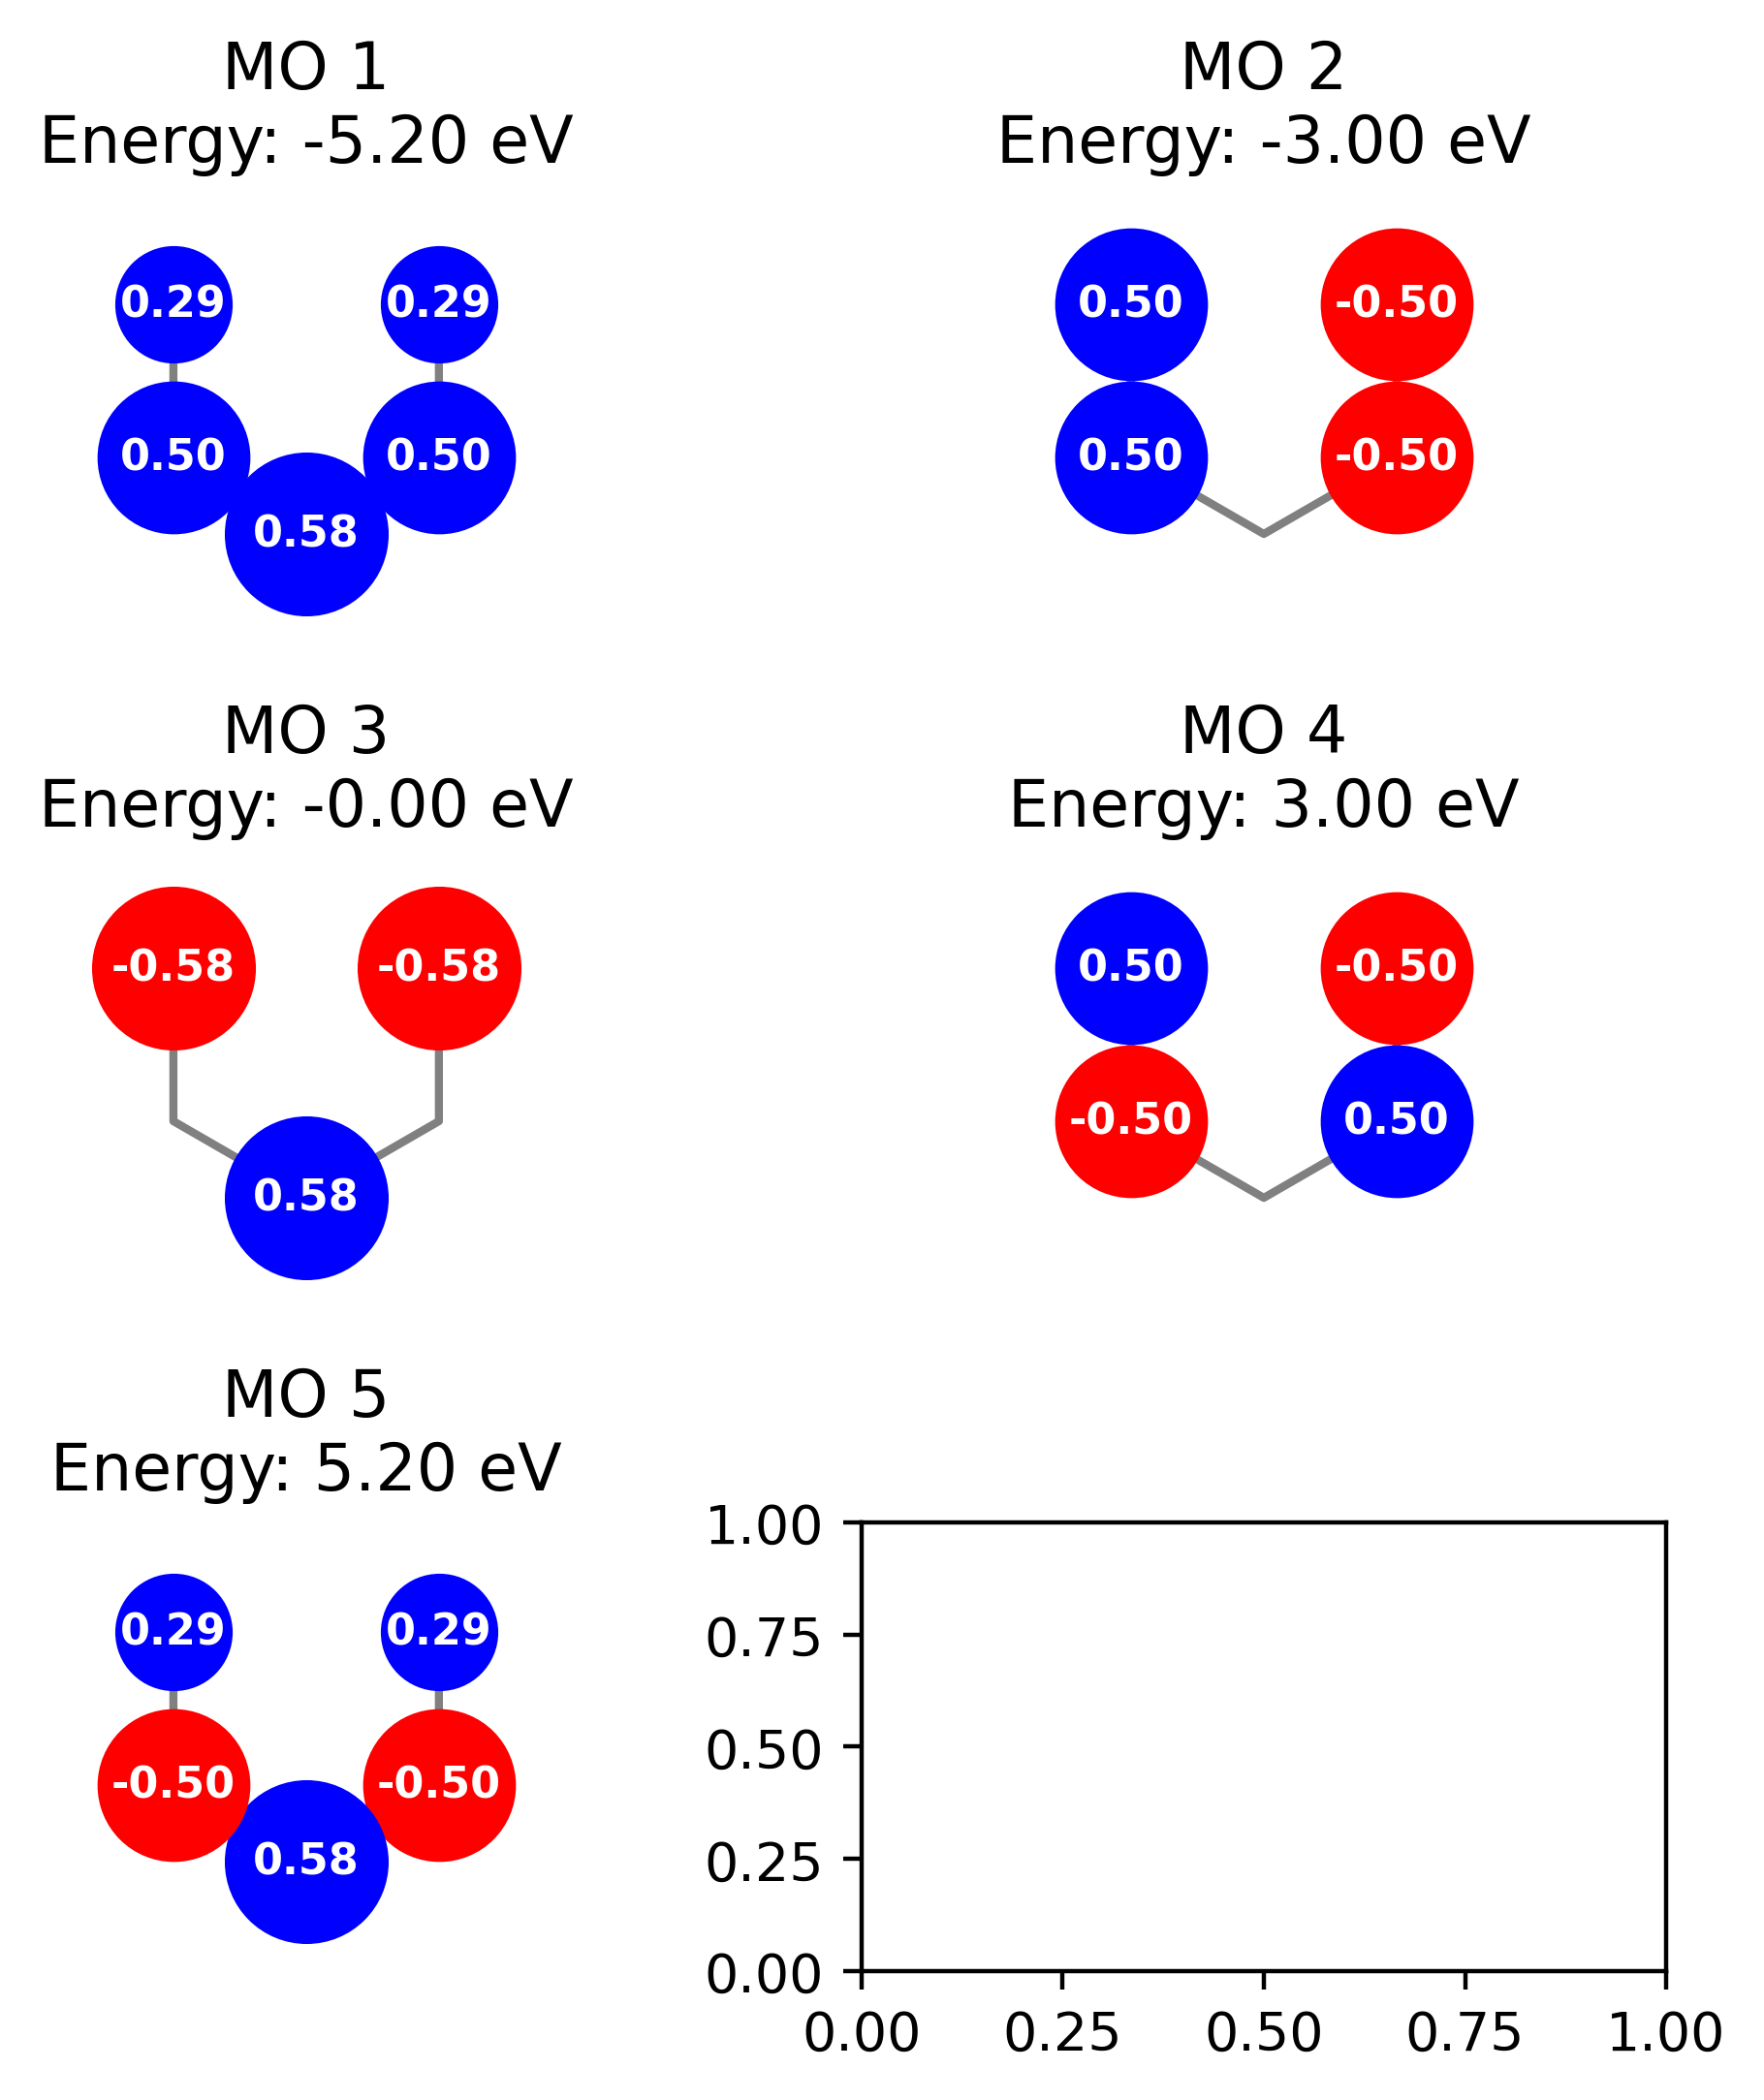

In [50]:
pts.plot_MOs(vis_en, vis_mo, coordinates, extra_bounds, (5,6))

In [45]:
mat = np.zeros((5,5))
mat[0][0] = 1
print(mat)
print(eigenvectors[:3])
density = eigenvectors[:3] @mat@ eigenvectors[:3].T
print(density.round(6))

[[1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]]
[[ 0.28867507  0.5         0.57735027  0.5         0.28867507]
 [-0.50000012 -0.5        -0.          0.5         0.50000012]
 [-0.57735013 -0.          0.57735027 -0.         -0.57735013]]
[[ 0.083333 -0.144338 -0.166667]
 [-0.144338  0.25      0.288675]
 [-0.166667  0.288675  0.333333]]


In [46]:
eigval, eigvec = np.linalg.eigh(density)
print(eigval, eigvec)

[-5.03314863e-18  7.12945855e-17  6.66666589e-01] [[ 0.90404724 -0.24020538  0.35355333]
 [ 0.02957848 -0.79001576 -0.61237261]
 [ 0.4264079   0.56407134 -0.70710666]]


In [47]:
S_ohm = 0
for eigenvalue in eigval:
    if (eigenvalue.round(6) != 0):
        S_ohm -= (eigenvalue*np.log(eigenvalue) + (1-eigenvalue)*np.log(1-eigenvalue))
print(2*S_ohm)

1.2730284443162732


In [48]:
mat1 = np.zeros((5,5))
mat2 = np.zeros((5,5))
mat1[0][0] = 1
mat2[1][1]= 1

mat1_2 = mat1 + mat2
print(mat1_2)
print(eigenvectors[:3])
eigenvectors[:3] @mat1@ eigenvectors[:3].T

[[1. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]]
[[ 0.28867507  0.5         0.57735027  0.5         0.28867507]
 [-0.50000012 -0.5        -0.          0.5         0.50000012]
 [-0.57735013 -0.          0.57735027 -0.         -0.57735013]]


array([[ 0.08333329, -0.14433757, -0.16666659],
       [-0.14433757,  0.25000012,  0.28867513],
       [-0.16666659,  0.28867513,  0.33333318]])